## This is a small example on how to use the Naive Bayes model to solve a classification problem

In [5]:
#Load data and inspect
h<-read.csv('Categoricos1.csv',sep=';')
head(h)

X,A,B,C,D,E,R
1,3,3,5,1,2,0
2,3,4,4,2,4,1
3,3,2,4,1,5,1
4,2,3,2,2,8,1
5,1,4,2,2,5,1
6,5,1,4,1,4,1


In [29]:
# Check how many values we have
nrow(h)

[1] 1000

In [6]:
# The dataset consist in n cases with 5 attributes (A, B, C, D, E) and a categorical result R

In [7]:
#Take a look at the results that we want to clasify
table(h$R)


  0   1   2   3   4 
114 619 225  40   2 

In [8]:
# There are 5 different results

In [9]:
#Convert results to factor
h$R<-as.factor(h$R)

In [10]:
# Split in train and test
x<-runif(nrow(h))
htrain<-h[which(x<.7),]
htest<-h[which(x>=.7),]

In [11]:
# Load the library for using Naive Bayes suppressing the warning
suppressWarnings(library(e1071))

In [12]:
# Build the model using the train set
nb <- naiveBayes(R ~X + A + B + C + D + E , htrain)

In [13]:
# Predict
p <- predict(nb,newdata = htest)

In [14]:
# Check the structure of the prediction
str(p)

 Factor w/ 5 levels "0","1","2","3",..: 2 2 2 2 2 2 2 2 2 2 ...


In [15]:
# Convert p to vector form
stp <- as.vector(p)
str(stp)

 chr [1:298] "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "0" "1" "1" ...


In [16]:
# Inspect stp
table(stp)

stp
  0   1   2 
  7 290   1 

In [17]:
# Evaluate succesful predictions

pv <- as.vector(p)
rv <- as.vector(htest$R)
success <- length(which(pv==rv))
total <- nrow(htest)
success/total

[1] 0.614094

In [18]:
## We build a matrix and fill it with the results

m <- matrix(nrow=5, ncol=5, 0)

for(i in 0:4)
{ 
for(j in 0:4)
{
m[i+1,j+1] <- length(which(pv == i & rv == j))
}
}

m

6,1,0,0,0
31,177,66,15,1
0,0,0,1,0
0,0,0,0,0
0,0,0,0,0


In [19]:
# Not every error is the same, some are closer than others. We check the almost succesful predictions
almost <- length(which(abs((as.numeric(rv)-as.numeric(pv)))<=1))

In [20]:
# Percentage
almost/nrow(htest)

[1] 0.9463087

In [21]:
# Classes with less values are more predominant to errors. To reduce this effect it is recommended to rebalance the classes.
# To do that we separate every class
h0 <- h[which(h$R==0),]
h1 <- h[which(h$R==1),]
h2 <- h[which(h$R==2),]
h3 <- h[which(h$R==3),]
h4 <- h[which(h$R==4),]

In [22]:
# We create a filter to diminish those classes with more values
cnt <- 100

h0f <- h0[which(runif(nrow(h0))<cnt/nrow(h0)),]
h1f <- h1[which(runif(nrow(h1))<cnt/nrow(h1)),]
h2f <- h2[which(runif(nrow(h2))<cnt/nrow(h2)),]
h3f <- h3[which(runif(nrow(h3))<cnt/nrow(h3)),]
h4f <- h4[which(runif(nrow(h4))<cnt/nrow(h4)),]

hf <- rbind(h0f,h1f,h2f,h3f,h4f)

In [23]:
# We compare the number of cases with the original dataset and the rebalanced one
table(hf$R)
table(h$R)


  0   1   2   3   4 
101  92 103  40   2 


  0   1   2   3   4 
114 619 225  40   2 

In [24]:
# We build the new model
x <- runif(nrow(hf))
hftrain <- hf[which(x<.7),]
hftest <- hf[which(x>=.7),]

nbf <- naiveBayes(R ~ A + B + C + D + E,hftrain)

In [25]:
# Make new predictions

pf <- predict(nbf, newdata = hftest)

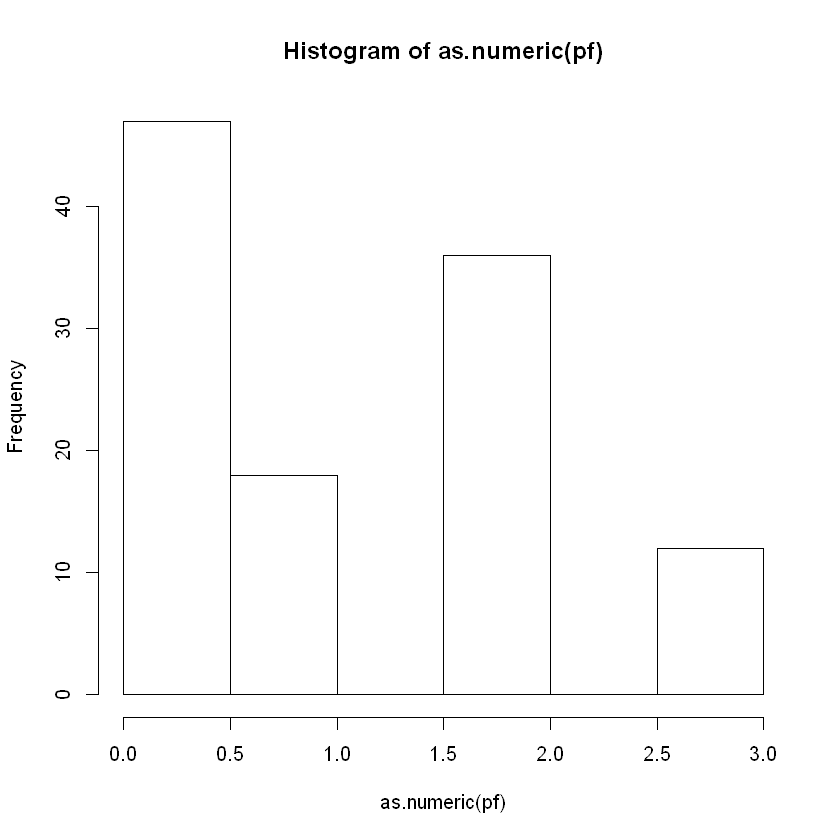

In [26]:
# Check the results


pf <- as.vector(pf)

hist(as.numeric(pf))

In [28]:
# Evaluate succesful predictions

pvf <- as.vector(pf)
rvf <- as.vector(hftest$R)
succesf <- length(which(pvf==rvf))
totalf <- nrow(hftest)
succesf/totalf

[1] 0.5486726

## Rebalancing the classes doesn't always improve the model. In this case we don't have enough values so that's why the percentage of success is lower.